# Data Glacier Data Science:: Bank Marketing (Campaign) -- Group Project
# Bank Marketing (Campaign)
 

Problem Statement:

ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

 

Why ML Model: Bank wants to use ML model to shortlist customer whose chances of buying the product is more so that their marketing channel (tele marketing, SMS/email marketing etc)  can focus only to those customers whose chances of buying the product is more.

This will save resource and their time ( which is directly involved in the cost ( resource billing)).

Develop model with Duration and without duration feature and report the performance of the model.

Duration feature is not recommended as this will be difficult to explain the result to business and also it will

be difficult for business to campaign based on duration.

# Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
ba_df = pd.read_csv('/content/bank-additional.csv',sep=';')
baf_df = pd.read_csv('/content/bank-additional-full.csv',sep=';')

In [ ]:
baf_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
baf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
baf_df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [ ]:
print( f"No. of duplicated rows: {baf_df.duplicated().sum()}")

No. of duplicated rows: 12


# Observations:
1. From the output of the code, we can see that there are roughly the same amount of categorical and numeric values in the columns.

2. age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m and nr.employed are numerical variables.

3. default, housing and loan have 3 values each (yes, no and unknown).

4. Outcome, y has two values: "yes" and "no".

5. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

6. No Null values found in dataset, meaning that we have a value for every column.

7. There are 12 duplicate rows present in the dataset that can be dropped.

8. We are discarding duration. This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

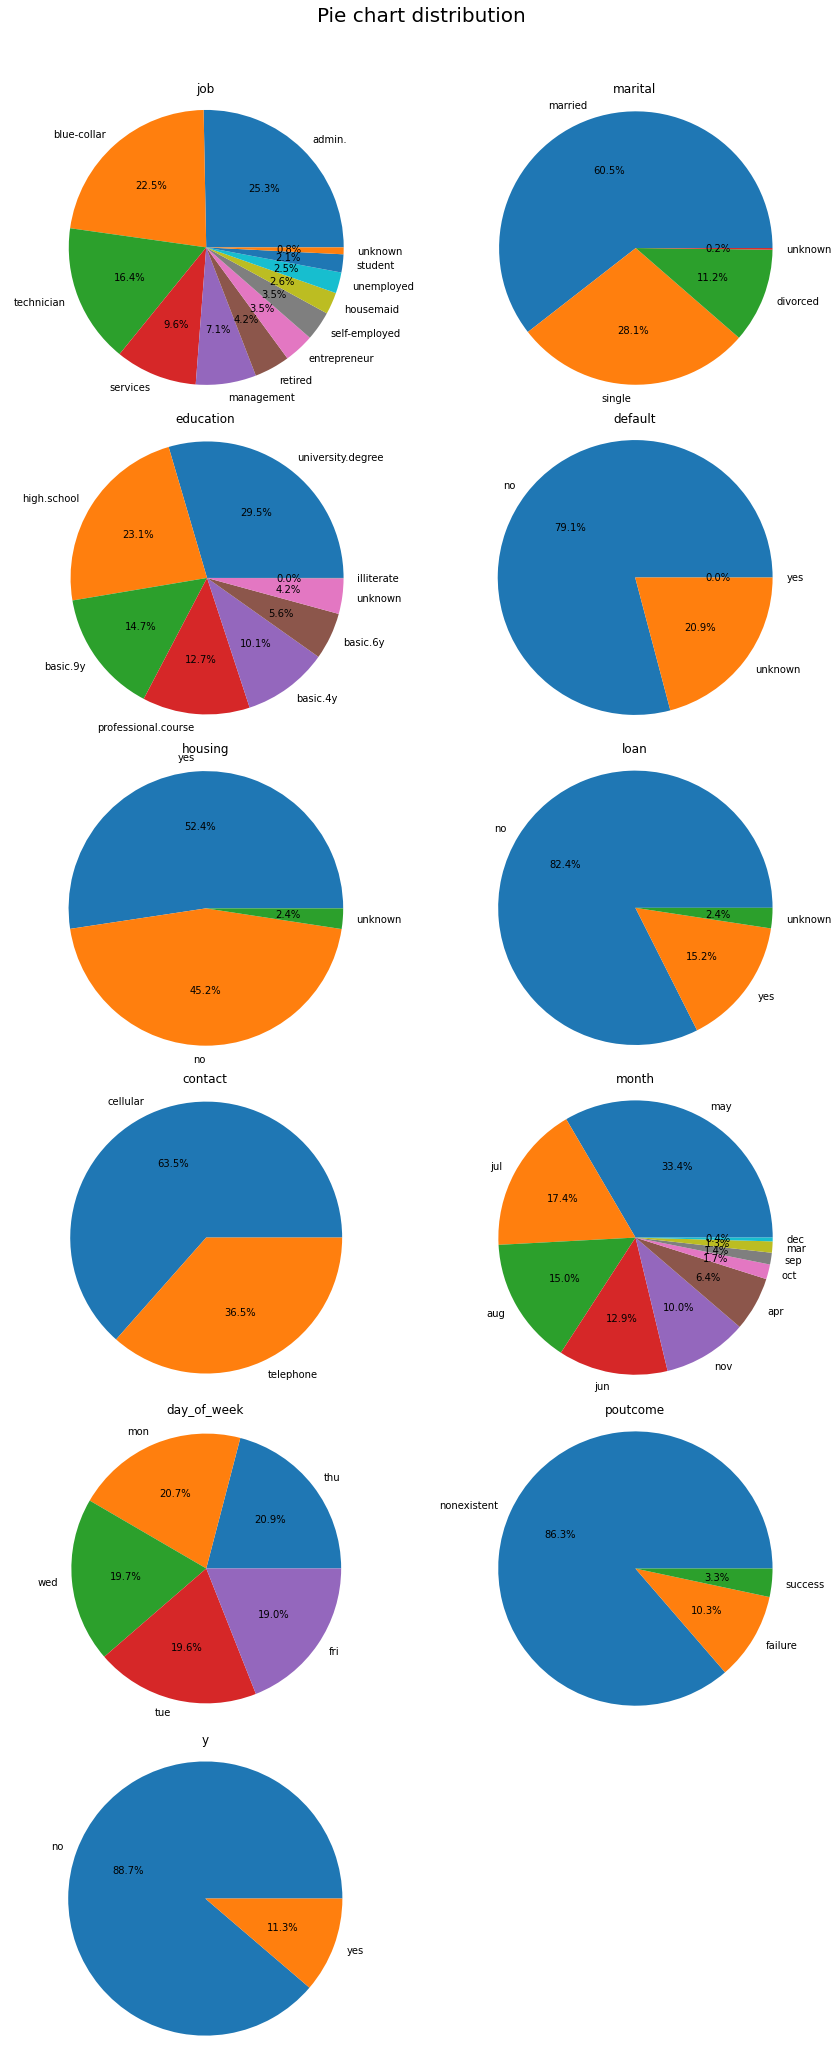

In [ ]:
dataset2 = baf_df[['job','marital', 'education', 'default', 'housing',
       'loan', 'contact','month','day_of_week','poutcome','y']]

fig = plt.figure(figsize=(12,30))
plt.suptitle('Pie chart distribution', fontsize=20)

for i in range(1, dataset2.shape[1]+1):
    plt.subplot(6,2,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    
    values = dataset2.iloc[:,i-1].value_counts(normalize = True).values
    index = dataset2.iloc[:,i-1].value_counts(normalize = True).index
    
    plt.pie(values, labels=index, autopct='%1.1f%%')
    plt.axis('equal')

plt.tight_layout(rect=[0,0.03,1,0.95])

From the above pie chart we see that percet for the positive class is 11.3% which means that the proportion of people who agreed to a term deposit (positive class) compared to the people who did not is 11.3%. That tells us that data seems unbalanced and maybe we need to use some balancing technique before building and training the model.

In [ ]:
#count the number of rows for each type
baf_df.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

Now Lets convert output varaible y from categorical to numerical, which is going to represent 0 for the negative class and 1 for the positive class based on the bank marketing data set. This will be helpful to find corelation between output variable and other features.

In [ ]:
baf_df['output'] = (baf_df.y == 'yes').astype('int')

In [ ]:
baf_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,output
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


## Outliers detection
Lets check for distribution of numerical variables with the help of boxplot and see if we can find for any kind of outliers.

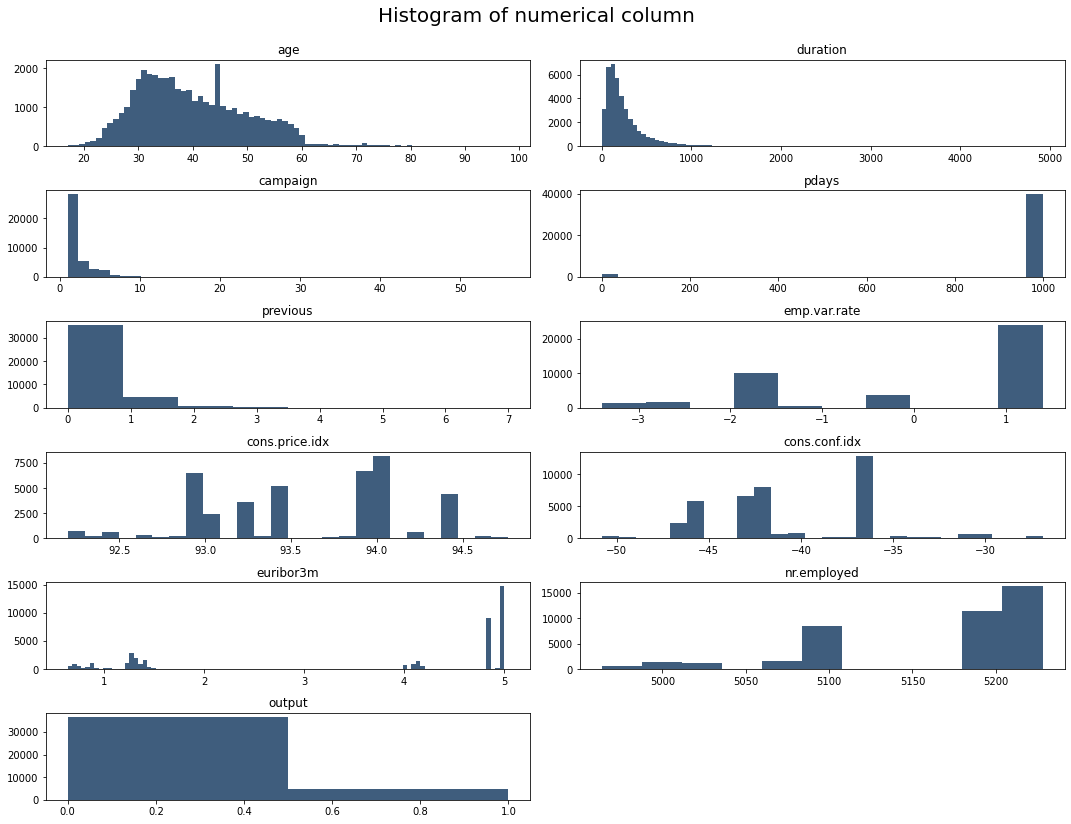

In [ ]:
dataset1 = baf_df.drop(columns=['job','marital', 'education', 'default', 'housing',
       'loan', 'contact','month','day_of_week','poutcome','y'])

fig = plt.figure(figsize=(15,12))
plt.suptitle("Histogram of numerical column", fontsize=20)

for i in range(dataset1.shape[1]):
    plt.subplot(6,2,i+1)
    f= plt.gca()
    f.set_title(dataset1.columns.values[i])
    
    vals = np.size(dataset1.iloc[:,i].unique())
    if vals>=100:
        vals=100
    
    plt.hist(dataset1.iloc[:,i], bins= vals, color="#3F5D7D")
    
plt.tight_layout(rect=[0,0.03,1,0.95])

In [ ]:
baf_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,output
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


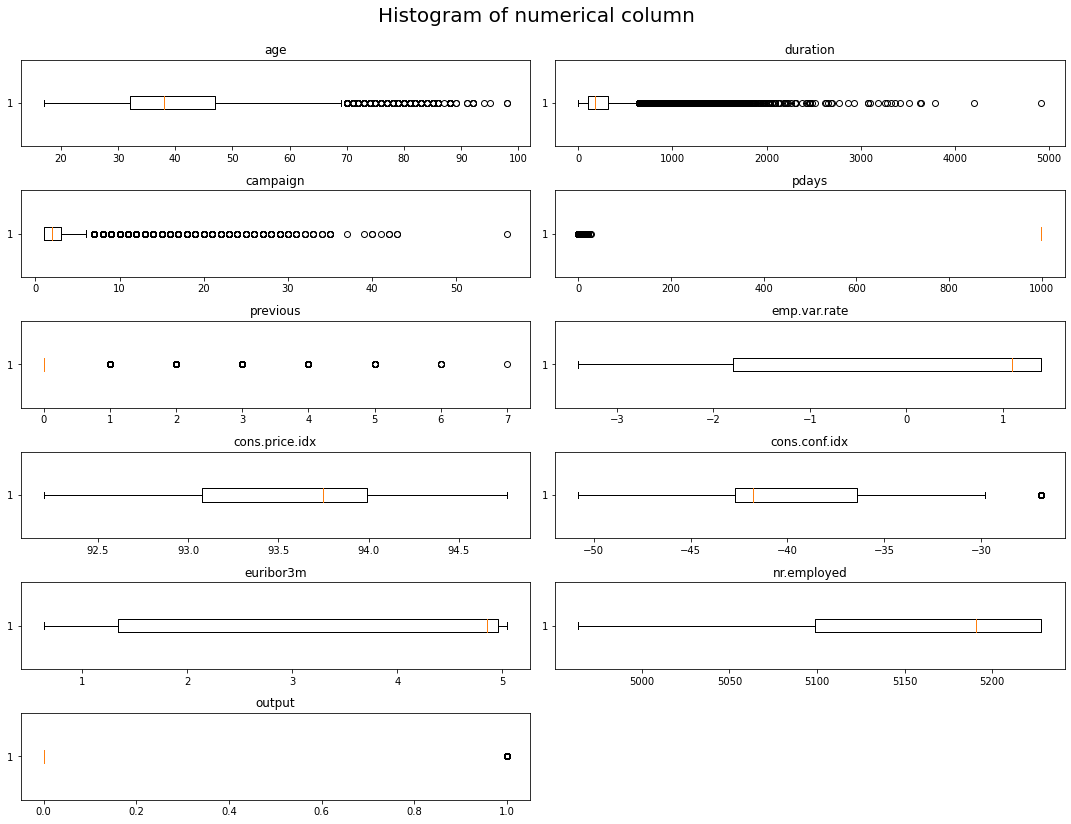

In [ ]:
# Box plots

fig = plt.figure(figsize=(15,12))
plt.suptitle("Histogram of numerical column", fontsize=20)

for i in range(dataset1.shape[1]):
    plt.subplot(6,2,i+1)
    f= plt.gca()
    f.set_title(dataset1.columns.values[i])
    
    
    plt.boxplot(x=dataset1.columns.values[i], data = dataset1, vert=False)
    
plt.tight_layout(rect=[0,0.03,1,0.95])

## Skewness: 

- Positive value implies the assymmetry in the distribution is in the right side of the mean. The tail is in the right.
- Negative value implies the assymmetry in the distribution is in the left side of the mean. The tail is in left.

In [ ]:
print(baf_df.skew(axis = 0, skipna = True))

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
output            2.450330
dtype: float64


<ipython-input-23-2b24c5dcc357>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(baf_df.skew(axis = 0, skipna = True))


### Kurtosis: 
- It is the measure of whether or not a distribution has a heavy tail or not relative to the normal distribution.
- Kurtosis > 3 implies the distribution has a heavy tail than the normal distribution.
- Kurtosis < 3 implies the distribution has a light tail than the normal distribution.

In [ ]:
print(baf_df.kurt(axis = 0))

age                0.791312
duration          20.247938
campaign          36.979795
pdays             22.229463
previous          20.108816
emp.var.rate      -1.062632
cons.price.idx    -0.829809
cons.conf.idx     -0.358558
euribor3m         -1.406803
nr.employed       -0.003760
output             4.004312
dtype: float64


<ipython-input-26-8fcb0af43be9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(baf_df.kurt(axis = 0))


In [ ]:
def find_upper_outliers(dataframe, column_name):
    c_name = dataframe[column_name]
    mean = np.mean(c_name)
    std = np.std(c_name)
    outliers = [i for i in c_name if i > mean + (3 * std)]
    outliers.sort()
    print("How many outliers are there: " + str(len(outliers)))
    print(outliers[:10])
    return outliers
  

In [ ]:
find_upper_outliers(baf_df, 'age')

So, we are dropping the "default" and "outcome" columns, as well as the upper outliers from the "age," "balance," and "duration" columns. And we don't have low outliers.

In [ ]:
# maybe we shouldn't drop duration and age upper outliers because their subcribe percentage is high for upper duration 56%
# and for upper age 45% in bank dataset

In [ ]:
# What do you think about applying logarithmic transformations for age and duration columns?

In [ ]:
# When I applied log transformation, 'duration' and 'age' outliers gone